<a href="https://colab.research.google.com/github/AbhirKarande/AbhirKarande/blob/main/BostonHousingPrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Comparison of Regression Models on Housing Prices in Boston, MA

### CS 2501 Machine Learning - Department of Computer Science - University of Virginia
![(Image Credit Boston.gov)](https://www.boston.gov/sites/default/files/img/topic/intro_images/2017/06/housing1.jpg)
In this assignment, you will practice the 8 steps of an end-to-end ML project in the context of a **regression** problem in the [Boston Housing Dataset on Kaggle](https://www.kaggle.com/vikrishnan/boston-house-prices) (Image Credit: Boston.gov). You will attempt to predict the housing prices in the Boston Metropolitian Area. The data was collected in the 70s, so the housing prices were much lower than it is today. For references, you may refer to my slides or the Google Colab if you need additional sample codes to help with your assignment. To get started, you will need to upload/copy the dataset (.csv) into the same Colab workspace. 

For deliverables, you must write code in Colab and submit the downloaded Jupyter Notebook file (.ipynb) to earn a total of 150 pts. You will gain points depending on how you perform in the following sections.

## Step 1: Big Picture and Setup
Write a paragraph explaining the context of the problem in which you are trying to investigate. Your paragraph may frame the problem and objectives by answering the following questions:
* What is the task: regression, classification, clustering, visualization?
* What to expect, use, and benefit from this model?
* What performance measure to evaluate?
* How much data is available or to be collected?
* What learning algorithm to be used?
* How much effort to be spent?
* Verify the assumptions that have been made about the context

In [ ]:
import numpy as np
import pandas as pd

np.random.seed(42)

## Step 2: Load the Data
We will assume that the data file is put into the same workspace on Colab. Then, you can write some code to load the CSV file and take a quick look at the dataset, and output the following:

 * How big is your dataset? (in terms of MB)
 * How many entries does it have?
 * How many features does it have?
 * Does it contain any categorical data?
 * Is there any missing value?
 * What are some basic statistics you can learn right away about this dataset?

In [ ]:
# To help you get started, a load function is provided below. 
# You will need to fill in the code under #TODO to make it work.
def loadBostonHousingData():
  # The column names are adopted from the dataset page on Kaggle   
  columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
  housing = pd.read_csv('housing.csv', names=columns, delim_whitespace=True)
  return housing
housing = loadBostonHousingData()
# Call the function to load your dataset here

## Step 3. Discover and visualize the data to gain insights
**Data Discover:** Plot out all correlations among the features. You should notice some features are more correlated with your predicted value than other. This information will help you confirm that weights of your regression model later on.

In [ ]:
housing.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


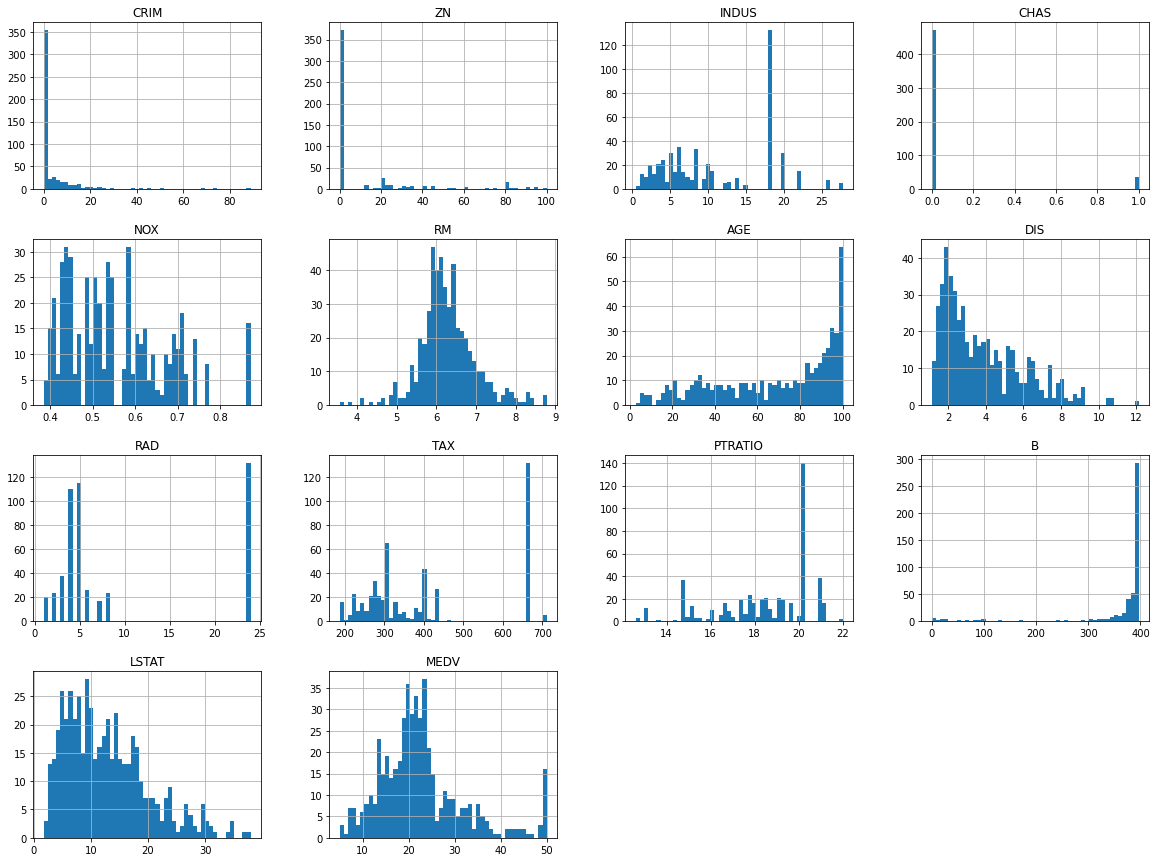

In [ ]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
print(housing.shape)

(506, 14)


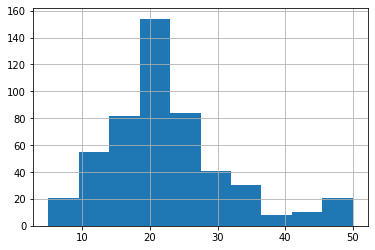

In [ ]:
housing['MEDV'].hist()

In [ ]:
corr_matrix = housing.corr()
corr_matrix.shape
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

RM, LSTAT, and PTRATIO are the variables that seem to have the most impact on MEDV. 

##  Step 4: Data Preparation and Cleaning
You have to split the data into training set, validation set, and test set. You may use the `train_test_split()` function *twice*: first is to split into train and set, then to split the train again into training and validation sets.

Next, you need to construct the following:

* **Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the `Imputer` class. 

* **Feature Scaling:** Your task is to call the `StandardScaler` to normalize the value of each features.

* **Transformation Pipeline:** More importantly, you will need to integrate the above operations into a `Pipeline` to process and transform the training data (via `fit_transform()`), then use the same pipeline to transform any validation and testing data (using `transform()` only).

In [ ]:
from sklearn.model_selection import train_test_split
train_set, validation_set = train_test_split(housing, test_size=0.2, random_state=42)


In [ ]:
X_train = train_set.drop("MEDV", axis = 1)
y_train = train_set['MEDV'].copy()
y_train = y_train/100000

X_valid = validation_set.drop("MEDV", axis=1) # drop label
y_valid = validation_set["MEDV"].copy()
y_valid = y_valid / 100000;

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
pipeline = Pipeline([('imputer', SimpleImputer(strategy = "median")), ('std_scaler', StandardScaler()),])
X_train = pipeline.fit_transform(X_train)

In [ ]:
X_valid = pipeline.transform(X_valid)
X_valid.shape

(102, 13)

## Step 5: Model Selection
You should use (at the minimum) the basic ML models which we’ve covered: `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. Then, you should do some Researching and trying some configuration of an Artificial Neural Networks as a `Sequential` model. For regression task, you do not need to use `softmax` function before producing the output of the network.You may use `RMSE` as the performance measure.

You must use 5-fold CV on the validation set to evaluate the performance of your models (hint: use the `


In [ ]:
import sklearn
import tensorflow as tf
import tensorflow.keras as keras

In [ ]:
y_valid.shape

(102,)

In [ ]:
X_valid.shape

(102, 13)

ANN Sequential Model Below

In [ ]:
from keras import backend
def rmse(y_true, y_pred):
  return keras.backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

In [ ]:
model_1 = keras.Sequential(); # Create the most widely used form of neural network: sequential one
model_1.add(keras.layers.Dense(13, activation='relu', input_shape=[13]))
model_1.add(keras.layers.Dense(2, activation='relu', input_shape=[2]))
model_1.compile(optimizer='sgd', loss='mean_squared_error', metrics=[rmse])
model_1.fit(X_train,y_train,epochs=10,validation_data=(X_valid, y_valid))


Epoch 1/10
13/13 [==============================] - 1s 33ms/step - loss: 0.0076 - rmse: 0.0263 - val_loss: 0.0077 - val_rmse: 0.0294
Epoch 2/10
13/13 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0215 - val_loss: 0.0058 - val_rmse: 0.0250
Epoch 3/10
13/13 [==============================] - 0s 3ms/step - loss: 0.0044 - rmse: 0.0182 - val_loss: 0.0045 - val_rmse: 0.0216
Epoch 4/10
13/13 [==============================] - 0s 3ms/step - loss: 0.0035 - rmse: 0.0159 - val_loss: 0.0036 - val_rmse: 0.0189
Epoch 5/10
13/13 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0139 - val_loss: 0.0029 - val_rmse: 0.0166
Epoch 6/10
13/13 [==============================] - 0s 3ms/step - loss: 0.0024 - rmse: 0.0125 - val_loss: 0.0024 - val_rmse: 0.0146
Epoch 7/10
13/13 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0113 - val_loss: 0.0020 - val_rmse: 0.0129
Epoch 8/10
13/13 [==============================] - 0s 4ms/step - loss: 0.0

Linear Regression below

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

y_pred = lin_reg.predict(X_valid)
lin_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
lin_rmse

4.928602182665336e-05

Decision Tree Regression below

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth = 6, random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [ ]:
y_pred = tree_reg.predict(X_valid)
tree_mse = mean_squared_error(y_valid, y_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

8.662876564628667e-05

Random Forest Regression Model below

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
y_pred1 = forest_reg.predict(X_valid)
for_rmse = np.sqrt(mean_squared_error(y_valid, y_pred1))
for_rmse

8.676962713415641e-05

## Step 6: Model Tuning

The RMSE for the three linear regression, decision tree, and random forest models each seem to produce a suspiciously low rmse when fit with the validation set. Will have to check each of them for overfitting, so that the models prediction can be replicated on other data as well. (Generalization > Memorization). The Sequential model seemed to hold up pretty well with a small RMSE, and the loss and validation loss did not fluctuate so it likely predicted without overfitting. However, there didn't seem to be much data in the first place and with such a small amount, there is always a greater risk of memorization.

In [ ]:
model_2 = keras.Sequential(); # Create the most widely used form of neural network: sequential one
model_2.add(keras.layers.Dense(13, activation='relu', input_shape=[13]))
model_2.add(keras.layers.Dense(8, activation='relu', input_shape=[8]))
model_2.add(keras.layers.Dense(2, activation='relu', input_shape=[2]))
model_2.compile(optimizer='sgd', loss='mean_squared_error', metrics=[rmse])
model_2.fit(X_train,y_train,epochs=10,validation_data=(X_valid, y_valid))

Epoch 1/10
13/13 [==============================] - 0s 14ms/step - loss: 0.1587 - rmse: 0.2864 - val_loss: 0.0740 - val_rmse: 0.1860
Epoch 2/10
13/13 [==============================] - 0s 5ms/step - loss: 0.0787 - rmse: 0.1858 - val_loss: 0.0419 - val_rmse: 0.1240
Epoch 3/10
13/13 [==============================] - 0s 3ms/step - loss: 0.0473 - rmse: 0.1315 - val_loss: 0.0282 - val_rmse: 0.0933
Epoch 4/10
13/13 [==============================] - 0s 4ms/step - loss: 0.0325 - rmse: 0.1014 - val_loss: 0.0208 - val_rmse: 0.0752
Epoch 5/10
13/13 [==============================] - 0s 3ms/step - loss: 0.0243 - rmse: 0.0837 - val_loss: 0.0162 - val_rmse: 0.0637
Epoch 6/10
13/13 [==============================] - 0s 3ms/step - loss: 0.0190 - rmse: 0.0714 - val_loss: 0.0129 - val_rmse: 0.0548
Epoch 7/10
13/13 [==============================] - 0s 3ms/step - loss: 0.0153 - rmse: 0.0614 - val_loss: 0.0106 - val_rmse: 0.0480
Epoch 8/10
13/13 [==============================] - 0s 5ms/step - loss: 0.0

In [ ]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 112       
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 18        
Total params: 312
Trainable params: 312
Non-trainable params: 0
_________________________________________________________________


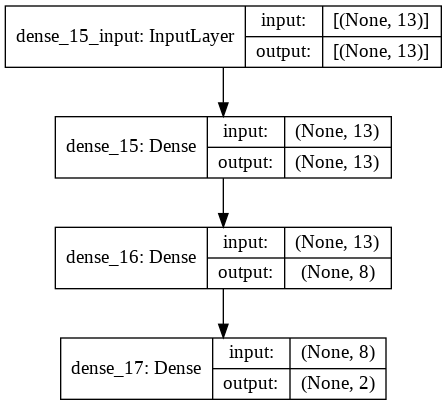

In [ ]:
keras.utils.plot_model(model_2, show_shapes=True)

In [ ]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 18        
Total params: 312
Trainable params: 312
Non-trainable params: 0
_________________________________________________________________


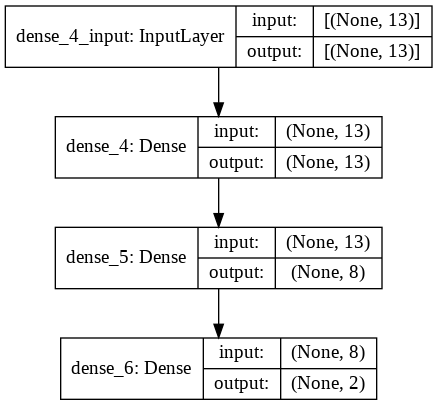

In [ ]:
keras.utils.plot_model(model_1, show_shapes=True)

In [ ]:
weights, biases = model_1.layers[0].get_weights()
weights

array([[ 0.41934094, -0.1706781 ,  0.4188403 ,  0.11484299,  0.30448216,
         0.34879613,  0.45477876, -0.12499014,  0.05202165, -0.18671733,
        -0.06462133, -0.34656855,  0.29578668],
       [ 0.3403689 ,  0.4530211 ,  0.10097586, -0.32027665,  0.03722896,
        -0.13644153, -0.17302342,  0.45468014, -0.2940437 ,  0.26573637,
        -0.23313   ,  0.38624334, -0.4012146 ],
       [-0.11901119,  0.1053119 , -0.06353894, -0.46949264, -0.12238028,
         0.12855574,  0.05735173,  0.41058993, -0.25143036,  0.07763652,
        -0.4153033 , -0.15596254,  0.08880199],
       [ 0.3120323 ,  0.09347133,  0.15751553,  0.14125301,  0.3387536 ,
         0.09923617, -0.2885303 ,  0.36678934,  0.4380086 ,  0.4466808 ,
        -0.30747223,  0.37822455,  0.06156565],
       [-0.1503638 , -0.07676173, -0.12228876, -0.30320388,  0.4113197 ,
         0.16469292, -0.3254891 , -0.32384604,  0.21751115, -0.439664  ,
        -0.04929086,  0.37022525, -0.2981414 ],
       [-0.17830914,  0.205320

In [ ]:
biases

array([ 0.0046394 , -0.00294204,  0.00111207, -0.00069396,  0.00339714,
       -0.0031255 , -0.00126102, -0.00839707,  0.00036514, -0.011881  ,
        0.00330372,  0.00138199, -0.00241577], dtype=float32)

Not much to analyze with the weights and biases. They are more so for interpreting the connection from input to output of each layer.

Epoch 1/20
13/13 [==============================] - 0s 6ms/step - loss: 0.0078 - rmse: 0.0383 - val_loss: 0.0057 - val_rmse: 0.0306
Epoch 2/20
13/13 [==============================] - 0s 3ms/step - loss: 0.0068 - rmse: 0.0349 - val_loss: 0.0051 - val_rmse: 0.0282
Epoch 3/20
13/13 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0318 - val_loss: 0.0046 - val_rmse: 0.0260
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 0.0054 - rmse: 0.0295 - val_loss: 0.0041 - val_rmse: 0.0242
Epoch 5/20
13/13 [==============================] - 0s 3ms/step - loss: 0.0049 - rmse: 0.0274 - val_loss: 0.0037 - val_rmse: 0.0226
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 0.0045 - rmse: 0.0255 - val_loss: 0.0034 - val_rmse: 0.0212
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 0.0041 - rmse: 0.0241 - val_loss: 0.0031 - val_rmse: 0.0198
Epoch 8/20
13/13 [==============================] - 0s 4ms/step - loss: 0.00

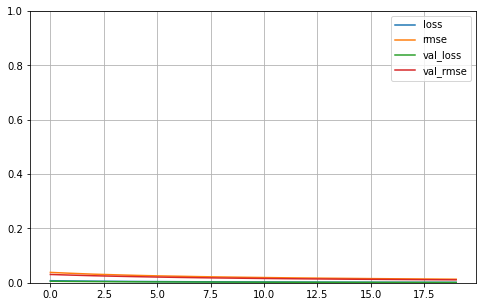

In [ ]:
history = model_2.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Even with a doubled amount of epochs there seems to be no obvious indication of overfitting and performance with this model_2 still has an exceptional root mean square error. 

## Step 7: Solution Presentation
Now that you need to write a short memo of one paragraph to be read by a non-technical audience (ie. your manager/supervisor). Focus on answering the following: 

* How can you pitch your solution to this project? 
* What did you learn so far about the problem?
* Is there any insight moving forward to improve the solution?

With this project we were able to perform a regression prediction on the Boston housing market based off of variables including crime rate, land zone square footage, industry presence, tax rate and several other attributes. Given any data for the above 13 independent variables, we are able to produce an accurate prediciton for what the housing price might be. The four models that were used for this prediction were an Artificial Neural Network Sequantial model, a Linear Regression model, a Decision-Tree model, and a Random-Forest model. The sequential model was the model that didn't necessarily overfit, as the three other models had an unrealistically low, which means they were likely susceptible to overfitting. The sequential model however perhaps didn't overfit as there was no fluctuation in loss/validation loss and additionally, the root mean square error was very low, meaning that the regression was pretty accurate. From this problem, I learned the basics of implementing a regression model and preparing the data for actual analysis. The step of cleaning the data was very useful and will be very important as I go forward. There is definitely a need for more data, in order to move forward with any particular model here. Having right around 500 data points does not seem like enough to make anything too meaningful for consistent or commercial use. 

## Step 8: Model Launching, Monitoring, and Updating
You don't need to do anything for this step. However, in the real-world, this is a iterative process where you launch, monitor, update your model (on the cloud).

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my slides and/or the textbook
 * Talk to the TA, they are available and there to help you during her office hours (Wed and Sun)
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS2501 Assignment 1:...".

Best of luck and have fun!